<a href="https://colab.research.google.com/github/Sirius724/Computational-Physics/blob/main/%EC%A0%84%EC%82%B0%EB%AC%BC%EB%A6%AC%ED%95%99_4_First_order_differential_equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/전산 물리학"
data = "/content/drive/MyDrive/Colab Notebooks/전산 물리학/data"
import os
import numpy as np ; import math as mt
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

if not os.path.isdir(data): 
    os.makedirs(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Euler method


### Solve follow as diffential equation

$${dy \over dx} = {y \over x} + x^2 $$

In [127]:
import math as mt
import numpy as np
import os

dx = 1/1000 # 계산 간격 지정
X = np.arange(1,50,dx) # x 좌표 범위 지정
Y = np.zeros(len(X)); # Y, fx 값 리스트 생성
fx =np.zeros(len(X))
Y[0] = 1 # Y값의 초기 설정

def f(x,y): # 미분 방정식 대입
    fx1 = y/x+x**2
    return fx1

def exact(x): # 해석적 결과 비교 함수
    ex = (pow(x,3)+x)/2.0
    return ex

for i in range(len(X)-1): # Euler equation
    Y[i+1]=(Y[i]+f(X[i],Y[i])*dx)
    #print(Y[i+1])

for i in range(len(X)): # 해석적 fx 값 구하기
    fx[i]= exact(X[i])

save = open(f"{data}/Euler method.txt","w+")

for i in range(len(X)):
    save.write(f"{X[i]:.4f}    {Y[i]:.4f}    {fx[i]:.4f}\n")

save.close()

In [128]:
print(Y[10],fx[10])

1.0201353600448357 1.0201504999999977


            0           1           2
0       1.000      1.0000      1.0000
1       1.001      1.0020      1.0020
2       1.002      1.0040      1.0040
3       1.003      1.0060      1.0060
4       1.004      1.0080      1.0080
...       ...         ...         ...
48995  49.995  62502.5753  62506.2494
48996  49.996  62506.3250  62509.9992
48997  49.997  62510.0748  62513.7492
48998  49.998  62513.8248  62517.4993
48999  49.999  62517.5749  62521.2496

[49000 rows x 3 columns]


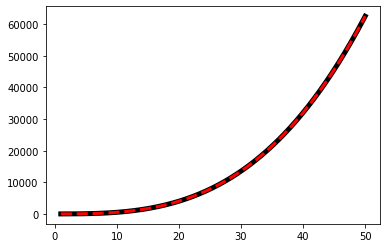

In [129]:
import pandas as pd
text_test = pd.read_csv("%s/Euler method.txt"%data, sep='    ',header=None,engine="python")
print(text_test)
%matplotlib inline
plt.plot(text_test[0],text_test[1], c = "black",linewidth = 5)
plt.plot(text_test[0],text_test[2], linestyle = "dashed", c = "r", linewidth = 3)

# 2nd-order Runge-Kutta method

In [141]:
dx = 1/1000
X = np.arange(1,51,dx)
Y,F = np.zeros(len(X)), np.zeros(len(X))

def exact(x):
    ex = (pow(x,3)+x)/2.0
    return ex

def f(x,y): # 미분 방정식 대입
    fx1 = y/x+x**2
    return fx1

Y[0]=1.0

for i in range(len(X)-1):
    k1 = dx*f(X[i],Y[i]) # k1 =dx*f(xn,yn)
    k2 = dx*f(X[i+1],Y[i]+dx) # k2 = dx*f(xn+dx,yn+k1)
    Y[i+1]= Y[i]+(k1+k2)/2.0 

for i in range(len(X)):
    F[i]=exact(X[i])

save = open(f"{data}/runge_2nd.txt","w+")

for i in range(len(X)):
    save.write(f"{X[i]:.4f}\t{Y[i]:.4f}\t{F[i]:.4f}\n")

save.close()


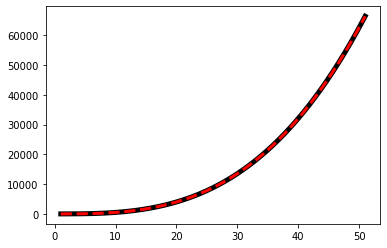

In [142]:
import pandas as pd
text_test = pd.read_csv("%s/runge_2nd.txt"%data, sep='\t',header=None,engine="python")
#print(text_test)
%matplotlib inline

plt.plot(text_test[0],text_test[1], c = "black",linewidth = 5)
plt.plot(text_test[0],text_test[2], linestyle = "dashed", c = "r", linewidth = 3)

## 4th-order Runge-Kutta method

In [148]:
dx = 1/100
X = np.arange(1,51,dx)
Y,F = np.zeros(len(X)), np.zeros(len(X))

def exact(x):
    ex = (pow(x,3)+x)/2.0
    return ex

def f(x,y): # 미분 방정식 대입
    fx1 = y/x+x**2
    return fx1

Y[0]=1.0
F[0]=exact(X[0])
for i in range(len(X)-1):
    k1 = dx*(Y[i]/X[i]+X[i]*X[i]) # k1 = dx*f(xn,yn)
    k2 = dx*f(X[i]+dx/2,Y[i]+k1/2) # k2 = dx *f(xn+dx/2,yn+k1/2)
    k3 = dx*f(X[i]+dx/2,Y[i]+k2/2) # k3 = dx *f(xn+dx/2,yn+k2/2)
    k4 = dx*f(X[i]+dx,Y[i]+k3) # k4 = dx * f(xn+dx,yn+k3)
    Y[i+1]= Y[i]+(k1+2*k2+2*k3+k4)/6
    F[i+1]=exact(X[i+1])

save = open(f"{data}/runge_4th.txt","w+")

for i in range(len(X)):
    save.write(f"{X[i]:.4f}\t{Y[i]:.4f}\t{F[i]:.4f}\n")

save.close()

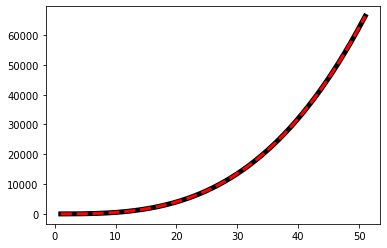

In [149]:
import pandas as pd
text_test = pd.read_csv("%s/runge_4th.txt"%data, sep='\t',header=None,engine="python")
#print(text_test)
%matplotlib inline

plt.plot(text_test[0],text_test[1], c = "black",linewidth = 5)
plt.plot(text_test[0],text_test[2], linestyle = "dashed", c = "r", linewidth = 3)

$${dy \over dx } = {2\over x}y +{1\over x^3} $$

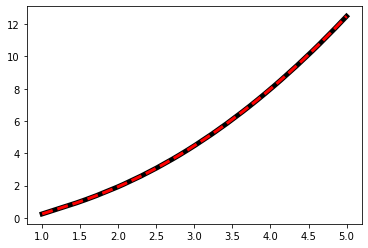

In [146]:
import math as mt
import numpy as np
import os

dx = 1/1000 # 계산 간격 지정
X = np.arange(1,5,dx) # x 좌표 범위 지정
Y,F = np.zeros(len(X)), np.zeros(len(X)) 

Y[0] = 1/4 # Y값의 초기 설정

def f(x,y): # 미분 방정식 대입
    fx1 = 2/x*y + 1/x**3
    return fx1

def exact(x): # 해석적 결과 비교 함수
    ex = -1/4*x**-2 + 1/2*x**2
    return ex

for i in range(len(X)-1): # Euler equation
    Y[i+1]=(Y[i]+f(X[i],Y[i])*dx)

for i in range(len(X)): # 해석적 fx 값 구하기
    fx[i]= exact(X[i])

save = open(f"{data}/Euler method.txt","w+")

for i in range(len(X)):
    save.write(f"{X[i]:.4f}\t{Y[i]:.4f}\t{fx[i]:.4f}\n")

save.close()

import pandas as pd
text_test = pd.read_csv("%s/Euler method.txt"%data, sep='\t',header=None,engine="python")
#print(text_test)
%matplotlib inline
plt.plot(text_test[0],text_test[1], c = "black",linewidth = 5)
plt.plot(text_test[0],text_test[2], linestyle = "dashed", c = "r", linewidth = 3)